<a href="https://colab.research.google.com/github/AleRozotto/Data_Analysis_Python/blob/main/6_Descriptive_Statistics_in_Python_Analisis_de_Datos_en_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Importar librerias
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
### Importamos dataset de valuación de jugadores de fútbol
### https://www.kaggle.com/datasets/davidcariboo/player-scores
df = pd.read_csv("player_valuations.csv")

#Initial exploration

In [ ]:
df

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1
...,...,...,...,...,...
487911,1077175,2024-10-18,3000000,252,IT1
487912,1083164,2024-10-18,1000000,252,IT1
487913,1110645,2024-10-18,500000,398,IT1
487914,1144700,2024-10-18,4000000,430,IT1


In [ ]:
## Cambiamos el nombre de la columna de inglés a español
df.rename(columns={'market_value_in_eur': 'precio_en_euros'}, inplace=True)

In [ ]:
# Ordenar el DataFrame en función de la columna precio_en_euros de manera descendente
df_sorted = df.sort_values(by='precio_en_euros', ascending=False)

df_sorted

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
293517,342229,2019-12-19,200000000,418,ES1
269401,342229,2019-06-03,200000000,418,ES1
487537,371998,2024-10-11,200000000,418,ES1
253166,342229,2018-12-17,200000000,418,ES1
486270,418560,2024-10-01,200000000,281,GB1
...,...,...,...,...,...
391574,72218,2022-02-01,10000,7185,GR1
351878,691841,2021-04-09,10000,738,FR1
450231,294699,2023-06-21,10000,86209,UKR1
441454,984674,2023-05-31,10000,1245,BE1


#Descriptive statistics.

###1. Basic Statistical Summary

In [ ]:
# Configurar el formato de visualización para mostrar números completos
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df.describe()

,player_id,precio_en_euros,current_club_id
count,487916.000,487916.000,487916.000
mean,219233.192,2403055.235,4404.578
std,201697.096,6810998.047,10835.501
min,10.000,0.000,3.000
25%,58413.000,200000.000,369.000
50%,161373.000,500000.000,1025.000
75%,325993.250,1600000.000,2995.000
max,1306131.000,200000000.000,110302.000


In [ ]:
### Funciones de Pandas
df['precio_en_euros'].mean()

2403055.2349154362

In [ ]:
df['precio_en_euros'].median()

500000.0

In [ ]:
df['precio_en_euros'].mode()

,precio_en_euros
0,300000


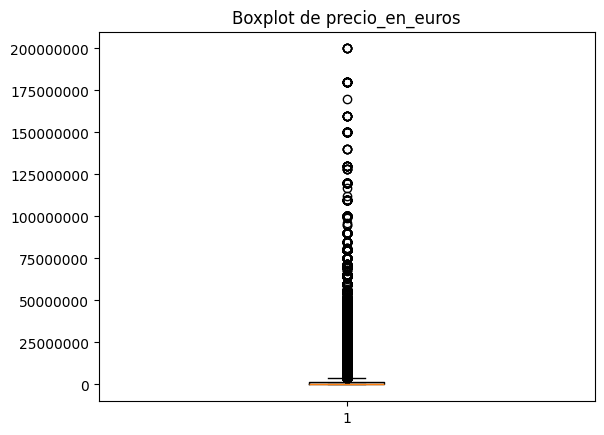

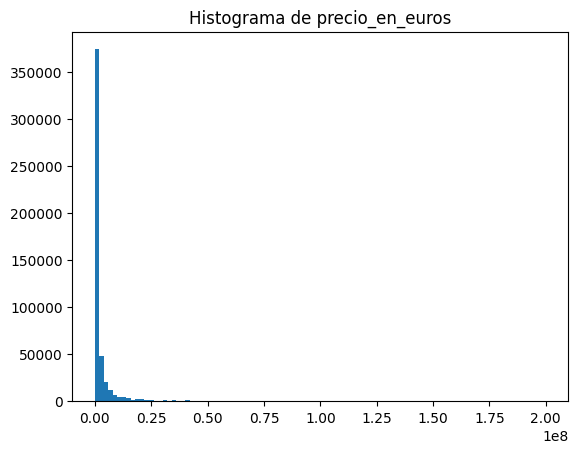

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df['precio_en_euros'])
plt.title('Boxplot de precio_en_euros')
plt.show()

# Histograma con matplotlib
plt.hist(df['precio_en_euros'], bins=100)  # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precio_en_euros')
plt.show()

Data Cleaning Using IQR

This process is related to identifying and handling outliers in a dataset. Here’s a detailed step-by-step explanation:

1. **Calculation of Quartiles (Q1, Q3):**

   - Q1 represents the first quartile, which is the value below which 25% of the data falls.
   - Q3 represents the third quartile, which is the value below which 75% of the data falls.
   - These quartiles divide the dataset into four equal parts.

2. **Calculation of the Interquartile Range (IQR):**

   - The interquartile range is the difference between the third quartile (Q3) and the first quartile (Q1).
   - Mathematically, IQR = Q3 - Q1.

3. **Defining Outlier Limits:**

   - Upper and lower limits are set to identify outliers in the data.
   - The lower limit is calculated by subtracting 1.5 times the IQR from Q1: `lower_bound = Q1 - 1.5 * IQR`.
   - The upper limit is calculated by adding 1.5 times the IQR to Q3: `upper_bound = Q3 + 1.5 * IQR`.

4. **Identification of Outliers:**

   - Any value in the dataset that is less than the lower limit or greater than the upper limit is considered an outlier.
   
This IQR-based approach is a common technique for identifying and managing outliers. The idea is that outliers lie beyond specific statistical limits and can be treated specially depending on the analysis requirements.

In [ ]:
# Calcular el rango intercuartílico (IQR)
Q1 = df['precio_en_euros'].quantile(0.25)
Q3 = df['precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites para considerar outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtrar el DataFrame para mantener solo los valores dentro de los límites
df_filtered = df[(df['precio_en_euros'] >= lower_bound) & (df['precio_en_euros'] <= upper_bound)]

In [ ]:
df_filtered

,player_id,date,precio_en_euros,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
5,26,2004-10-04,1500000,16,L1
...,...,...,...,...,...
487910,1004344,2024-10-18,800000,416,IT1
487911,1077175,2024-10-18,3000000,252,IT1
487912,1083164,2024-10-18,1000000,252,IT1
487913,1110645,2024-10-18,500000,398,IT1


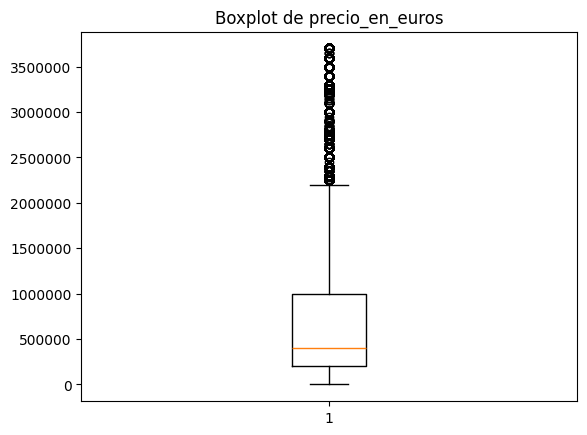

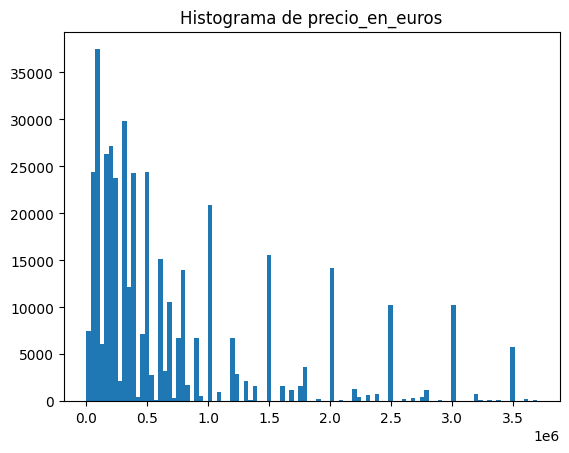

In [ ]:
# Ajustar la escala del eje Y para mostrar números completos
plt.ticklabel_format(style='plain', axis='y')

# Boxplot con matplotlib
plt.boxplot(df_filtered['precio_en_euros'])
plt.title('Boxplot de precio_en_euros')
plt.show()

# Histograma con matplotlib
plt.hist(df_filtered['precio_en_euros'], bins=100)  # Puedes ajustar el número de bins según tus preferencias
plt.title('Histograma de precio_en_euros')
plt.show()

##2. Medidas de dispersión

In [ ]:
### Rango
rango = df_filtered['precio_en_euros'].max() - df_filtered['precio_en_euros'].min()
rango

3700000

**Variance:**

Variance is a measure of the dispersion or spread of a dataset.  
It indicates how much individual values deviate from the mean (average) of the dataset.  
If the data is widely spread out, the variance will be high; if it’s clustered around the mean, the variance will be low.  
It’s calculated by summing the squares of the differences between each value and the mean, then dividing by the total number of values.

In [ ]:
### Varianza:
df_filtered['precio_en_euros'].var()

641323275719.3019

**Standard Deviation:**

The standard deviation is simply the square root of the variance.  
It provides a measure of dispersion on the same scale as the original data.  
It’s easier to interpret because it’s in the same units as the data.  
If the standard deviation is small, it means the data tends to be close to the average; if it’s large, it indicates the data is more spread out.

In [ ]:
### Desviación Estándar:
df_filtered['precio_en_euros'].std()

800826.6202614033

**3. Correlation:**

Correlation between two variables is a statistical measure that describes their relationship and dependency. In other words, correlation indicates how one variable changes in relation to the other.

Correlation measures the linear relationship between two variables. The correlation coefficient ranges from -1 to 1.

- If it’s 1, there is a perfect positive correlation.
- If it’s -1, there is a perfect negative correlation.
- If it’s 0, there is no linear correlation.

In [ ]:
# Creamos un nuevo dataframe solo con variables númericas para poder calcular la correlación
df_nuevo = df[['precio_en_euros', 'current_club_id']].copy()


In [ ]:
# Cálculo de la matriz de correlación
correlation_matrix = df_nuevo.corr()

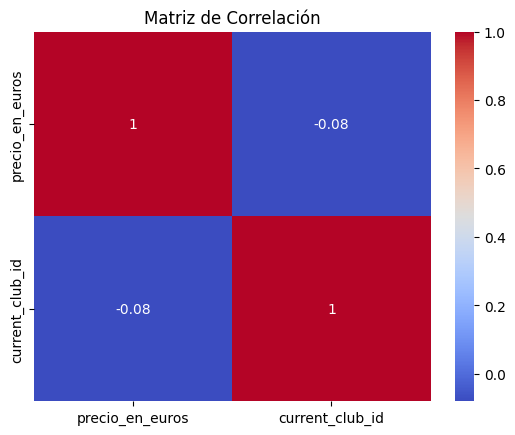

In [ ]:
# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**4. Scatter Plot:**

A scatter plot, also known as a scatter diagram, is a visual representation of the relationship between two variables. Each point on the scatter plot represents a pair of values (one for each variable) and is placed in a Cartesian coordinate system, where one variable is represented on the x-axis (horizontal) and the other on the y-axis (vertical).

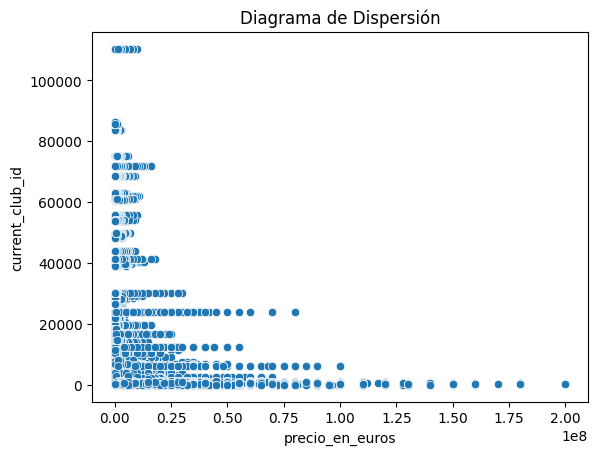

In [ ]:
# Diagrama de dispersión con Seaborn
sns.scatterplot(x='precio_en_euros', y='current_club_id', data=df_nuevo)
plt.title('Diagrama de Dispersión')
plt.show()

###5. Repeating Steps 3 and 4 with a Dataset Likely to Show Correlation Between Variables

In [ ]:
### Importamos dataset de valores casas
df_houses = pd.read_csv("kc_house_data.csv")
### https://www.kaggle.com/datasets/harlfoxem/housesalesprediction
df_houses

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.000,3,1.000,1180,5650,1.000,0,0,...,7,1180,0,1955,0,98178,47.511,-122.257,1340,5650
1,6414100192,20141209T000000,538000.000,3,2.250,2570,7242,2.000,0,0,...,7,2170,400,1951,1991,98125,47.721,-122.319,1690,7639
2,5631500400,20150225T000000,180000.000,2,1.000,770,10000,1.000,0,0,...,6,770,0,1933,0,98028,47.738,-122.233,2720,8062
3,2487200875,20141209T000000,604000.000,4,3.000,1960,5000,1.000,0,0,...,7,1050,910,1965,0,98136,47.521,-122.393,1360,5000
4,1954400510,20150218T000000,510000.000,3,2.000,1680,8080,1.000,0,0,...,8,1680,0,1987,0,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.000,3,2.500,1530,1131,3.000,0,0,...,8,1530,0,2009,0,98103,47.699,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.000,4,2.500,2310,5813,2.000,0,0,...,8,2310,0,2014,0,98146,47.511,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.000,2,0.750,1020,1350,2.000,0,0,...,7,1020,0,2009,0,98144,47.594,-122.299,1020,2007
21611,291310100,20150116T000000,400000.000,3,2.500,1600,2388,2.000,0,0,...,8,1600,0,2004,0,98027,47.535,-122.069,1410,1287


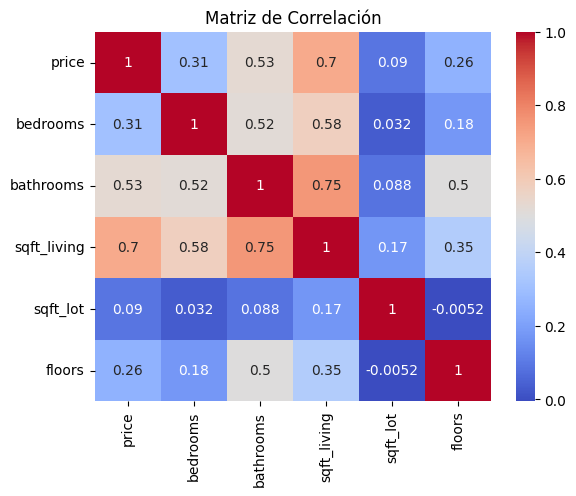

In [ ]:
# Creamos un nuevo dataframe con las variables númericas que nos interesan
df_houses_corr = df_houses[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors']].copy()
# Cálculo de la matriz de correlación
correlation_matrix = df_houses_corr.corr()

# Visualización del heatmap con Seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

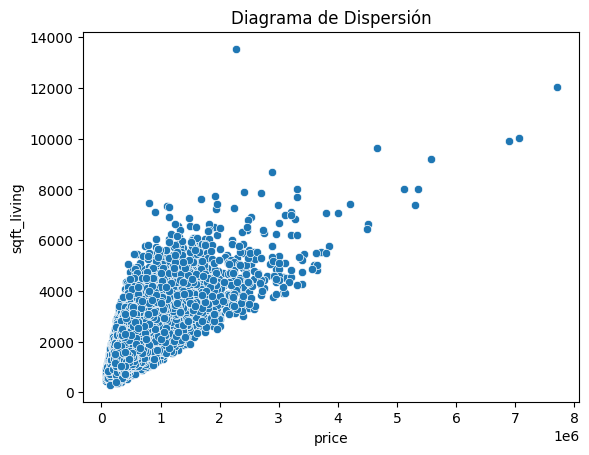

In [ ]:
### Diagrama de dispersión con Seaborn
### El diagrama de dispersión muestra la relación entre dos variables. Se puede usar para identificar patrones y tendencias.
sns.scatterplot(x='price', y='sqft_living', data=df_houses_corr)
plt.title('Diagrama de Dispersión')
plt.show()